# Feature Dihedral Contact

Usage: function plotting will plot rmsd, rmsd histogram, rmsf and PCA projection

In [10]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import pandas as pd
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
import MDAnalysis as mda
import itertools    
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import os

#XRD Ensemble

#28 4NPQ
#18 4HFI

In [2]:
residue_selection = 'resSeq 8 to 316'

In [3]:
traj_notes = ['5NJY_pH70_md1','5NJY_pH70_md2','5NJY_pH70_md3','5NJY_F238L_pH70_md1',
                 '5NJY_F238L_pH70_md2','5NJY_F238L_pH70_md3','5NJY_I233T_pH70_md4',
                  '5NJY_I233T_pH70_md2','5NJY_I233T_pH70_md3','5NJY_F238LI233T_pH70_md1',
                  '5NJY_F238LI233T_pH70_md2','5NJY_F238LI233T_pH70_md3','5NJY_pH46_md1','5NJY_pH46_md2','5NJY_pH46_md3',
              '5NJY_F238L_pH46_md1','5NJY_F238L_pH46_md2','5NJY_F238L_pH46_md3','5NJY_I233T_pH46_md1',
                  '5NJY_I233T_pH46_md2','5NJY_I233T_pH46_md3','5NJY_F238LI233T_pH46_md1',
                  '5NJY_F238LI233T_pH46_md2','5NJY_F238LI233T_pH46_md3','4HFI_pH46_md1',
              '4HFI_pH46_md2','4HFI_pH46_md3','4HFI_F238L_pH46_md1',
                 '4HFI_F238L_pH46_md2','4HFI_F238L_pH46_md3','4HFI_I233T_pH46_md1',
                  '4HFI_I233T_pH46_md2','4HFI_I233T_pH46_md3','4HFI_F238LI233T_pH46_md1',
                  '4HFI_F238LI233T_pH46_md2','4HFI_F238LI233T_pH46_md3','4NPQ_pH70_md5',
              '4NPQ_pH70_md6','4NPQ_pH70_md7','4NPQ_F238L_pH70_md3',
                 '4NPQ_F238L_pH70_md4','4NPQ_F238L_pH70_md5','4NPQ_I233T_pH70_md3',
                  '4NPQ_I233T_pH70_md4','4NPQ_I233T_pH70_md5','4NPQ_F238LI233T_pH70_md3',
                  '4NPQ_F238LI233T_pH70_md4','4NPQ_F238LI233T_pH70_md5']

In [27]:
def create_md_dataframe():    
    md_data = pd.DataFrame(columns=list(['MD_name','pH','replicate','traj_time']))
    return md_data

In [5]:
def create_metadata(md_data= None):   
    def append_metadata(traj_note,location = '/media/scottzhuang/data/MD/',skip=10,md_data= md_data):
        top_location = traj_note + '/' + traj_note + ".ca.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
        if skip == 1:
            traj = md.load(location + traj_location,top= location + top_location,stride=10)
        else:
            traj = md.load(location + traj_location,top= location + top_location)
        print("In " + traj_note + ", simulation runs " + str(10 * traj.n_frames) + " ns.")
        md_name = traj_note[:traj_note.find('pH')-1]
        pH = traj_note[traj_note.find('pH')+2:traj_note.find('pH')+4]
        md_replicate = traj_note[-1]
        for i in range(0,traj.n_frames):
            md_data.loc[md_data.shape[0]+1] = [md_name,pH,md_replicate,i]

    for traj_note in traj_notes:
        append_metadata(traj_note)

In [6]:
def create_system_notation(md_data = None):
    system_notation = 0
    notation = -1
    location = '/media/scottzhuang/data/MD/'
    skip=10
    notations = []
    increment = 0
    for traj_note in traj_notes:
        top_location = traj_note + '/' + traj_note + ".ca.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
        traj = md.load(location + traj_location,top= location + top_location)
        if traj_note.find('md1') >= 0:
            notation = notation + 1
        if traj_note == '5NJY_I233T_pH70_md4' or traj_note == '4NPQ_pH70_md5' or  traj_note == '4NPQ_F238L_pH70_md3' or traj_note == '4NPQ_I233T_pH70_md3' or traj_note == '4NPQ_F238LI233T_pH70_md3':
            notation = notation + 1

        for frame in range(0,traj.n_frames):
            notations.append(notation)
        #if increment % 3 == 2:
        #    notation = notation + 1
        #increment = increment + 1 
        
    md_data['system'] = notations

In [28]:
md_data = create_md_dataframe()
create_metadata(md_data= md_data)
create_system_notation(md_data = md_data)

In 5NJY_pH70_md1, simulation runs 1030 ns.
In 5NJY_pH70_md2, simulation runs 750 ns.
In 5NJY_pH70_md3, simulation runs 810 ns.
In 5NJY_F238L_pH70_md1, simulation runs 540 ns.
In 5NJY_F238L_pH70_md2, simulation runs 680 ns.
In 5NJY_F238L_pH70_md3, simulation runs 720 ns.
In 5NJY_I233T_pH70_md4, simulation runs 730 ns.
In 5NJY_I233T_pH70_md2, simulation runs 590 ns.
In 5NJY_I233T_pH70_md3, simulation runs 820 ns.
In 5NJY_F238LI233T_pH70_md1, simulation runs 830 ns.
In 5NJY_F238LI233T_pH70_md2, simulation runs 800 ns.
In 5NJY_F238LI233T_pH70_md3, simulation runs 880 ns.
In 5NJY_pH46_md1, simulation runs 780 ns.
In 5NJY_pH46_md2, simulation runs 1060 ns.
In 5NJY_pH46_md3, simulation runs 1030 ns.
In 5NJY_F238L_pH46_md1, simulation runs 930 ns.
In 5NJY_F238L_pH46_md2, simulation runs 950 ns.
In 5NJY_F238L_pH46_md3, simulation runs 1090 ns.
In 5NJY_I233T_pH46_md1, simulation runs 810 ns.
In 5NJY_I233T_pH46_md2, simulation runs 870 ns.
In 5NJY_I233T_pH46_md3, simulation runs 980 ns.
In 5NJY_F

In [63]:
md_data.to_csv("glic_gating_contact.csv")

In [4]:
md_data = pd.read_csv("glic_gating_contact.csv")

In [192]:
def create_psi_dihedral_data(md_data = None):
    def add_psi_dihedral_data(traj_note,location = '/media/scottzhuang/data/MD/', skip=10):
        top_location = traj_note + '/' + traj_note + ".protein.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".protein.xtc"
        traj = md.load(location + traj_location,top = location + top_location)
        traj = traj.atom_slice(traj.topology.select('backbone'))

        psi_dihedral = md.compute_psi(traj)
        psi_indice.append(psi_dihedral[0])
        sin_psi_dihedral_data.extend(np.sin(psi_dihedral[1]))
        cos_psi_dihedral_data.extend(np.cos(psi_dihedral[1]))
        
    sin_psi_dihedral_data = []
    cos_psi_dihedral_data = []
    psi_indice = []
    for traj_note in traj_notes:
        add_psi_dihedral_data(traj_note)
    index = 0
    for indice in psi_indice[0]:
        md_data['cos psi' + str(indice)] = np.asarray(cos_psi_dihedral_data).T[index]
        md_data['sin psi' + str(indice)] = np.asarray(sin_psi_dihedral_data).T[index]
        index = index + 1

In [9]:
def create_phi_dihedral_data(md_data = None):
    def add_phi_dihedral_data(traj_note,location = '/media/scottzhuang/data/MD/', skip=10):
        top_location = traj_note + '/' + traj_note + ".protein.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".protein.xtc"
        traj = md.load(location + traj_location,top = location + top_location)
        traj = traj.atom_slice(traj.topology.select('backbone'))
        phi_dihedral = md.compute_phi(traj)
        phi_indice.append(phi_dihedral[0])
        sin_phi_dihedral_data.extend(np.sin(phi_dihedral[1]))
        cos_phi_dihedral_data.extend(np.cos(phi_dihedral[1]))

    sin_phi_dihedral_data = []
    cos_phi_dihedral_data = []
    phi_indice = []
    for traj_note in traj_notes:
        add_phi_dihedral_data(traj_note)
    index = 0
    for indice in phi_indice[0]:
        md_data['cos phi' + str(indice)] = np.asarray(cos_phi_dihedral_data).T[index]
        md_data['sin phi' + str(indice)] = np.asarray(sin_phi_dihedral_data).T[index]
        index = index + 1

In [9]:
def create_contact7_data(md_data = None):
    def add_contact_data(traj_note,location = '/media/scottzhuang/data/MD/', skip=10):
        top_location = traj_note + '/' + traj_note + ".protein.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".protein.xtc"
        traj = md.load(location + traj_location,top = location + top_location)
        contact_data.extend(np.mean(md.compute_contacts(traj,contact_indice7)[0].reshape(traj.n_frames,int(len(contact_indice7)/5),5),axis=2))

    contact_indice7 = []
    for i in itertools.product(np.arange(215,243),np.arange(242,280)):
        for chain in range(0,4):
            contact_indice7.append([i[0] + chain * 311,i[1] + (chain + 1) * 311])
        contact_indice7.append([i[0] + 4 * 311,i[1]])
    
    contact_data = []
    for traj_note in traj_notes:
        add_contact_data(traj_note)
               
    n = 0   
    for i in itertools.product(np.arange(215,243),np.arange(242,280)):
        contact = []
        contact.extend(np.asarray(contact_data).T[n])
#        print(len(contact))
        md_data['contact ' + str(i[0] + 5) + ' and next' + str(i[1] + 5)] = contact
        n = n + 1

In [10]:
def create_contact6_data(md_data = None):
    def add_contact_data(traj_note,location = '/media/scottzhuang/data/MD/', skip=10):
        top_location = traj_note + '/' + traj_note + ".protein.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".protein.xtc"
        traj = md.load(location + traj_location,top = location + top_location)
        contact_data.extend(np.mean(md.compute_contacts(traj,contact_indice6)[0].reshape(traj.n_frames,int(len(contact_indice6)/5),5),axis=2))

    contact_indice6 = []
    for i in itertools.product(np.arange(215,243),np.arange(215,243)):
        for chain in range(0,4):
            contact_indice6.append([i[0] + chain * 311,i[1] + (chain + 1) * 311])
        contact_indice6.append([i[0] + 4 * 311,i[1]])
    
    contact_data = []
    for traj_note in traj_notes:
        add_contact_data(traj_note)
               
    n = 0   
    for i in itertools.product(np.arange(215,243),np.arange(215,243)):
        contact = []
        contact.extend(np.asarray(contact_data).T[n])
#        print(len(contact))
        md_data['contact ' + str(i[0] + 5) + ' and next' + str(i[1] + 5)] = contact
        n = n + 1

In [11]:
def create_contact5_data(md_data = None):
    def add_contact_data(traj_note,location = '/media/scottzhuang/data/MD/', skip=10):
        top_location = traj_note + '/' + traj_note + ".protein.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".protein.xtc"
        traj = md.load(location + traj_location,top = location + top_location)
        contact_data.extend(np.mean(md.compute_contacts(traj,contact_indice5)[0].reshape(traj.n_frames,int(len(contact_indice5)/5),5),axis=2))

    contact_indice5 = []
    for i in itertools.product(np.arange(191,215),np.arange(242,280)):
        for chain in range(0,4):
            contact_indice5.append([i[0] + chain * 311,i[1] + (chain + 1) * 311])
        contact_indice5.append([i[0] + 4 * 311,i[1]])
    
    contact_data = []
    for traj_note in traj_notes:
        add_contact_data(traj_note)
               
    n = 0   
    for i in itertools.product(np.arange(191,215),np.arange(242,280)):
        contact = []
        contact.extend(np.asarray(contact_data).T[n])
#        print(len(contact))
        md_data['contact ' + str(i[0] + 5) + ' and next' + str(i[1] + 5)] = contact
        n = n + 1

In [12]:
def create_contact4_data(md_data = None):
    def add_contact_data(traj_note,location = '/media/scottzhuang/data/MD/', skip=10):
        top_location = traj_note + '/' + traj_note + ".protein.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".protein.xtc"
        traj = md.load(location + traj_location,top = location + top_location)
        contact_data.extend(np.mean(md.compute_contacts(traj,contact_indice4)[0].reshape(traj.n_frames,int(len(contact_indice4)/5),5),axis=2))

    contact_indice4 = []
    for i in itertools.product(np.arange(191,215),np.arange(215,243)):
        for chain in range(0,4):
            contact_indice4.append([i[0] + chain * 311,i[1] + (chain + 1) * 311])
        contact_indice4.append([i[0] + 4 * 311,i[1]])
    
    contact_data = []
    for traj_note in traj_notes:
        add_contact_data(traj_note)
               
    n = 0   
    for i in itertools.product(np.arange(191,215),np.arange(215,243)):
        contact = []
        contact.extend(np.asarray(contact_data).T[n])
#        print(len(contact))
        md_data['contact ' + str(i[0] + 5) + ' and next' + str(i[1] + 5)] = contact
        n = n + 1

In [13]:
def create_contact3_data(md_data = None):
    def add_contact_data(traj_note,location = '/media/scottzhuang/data/MD/', skip=10):
        top_location = traj_note + '/' + traj_note + ".protein.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".protein.xtc"
        traj = md.load(location + traj_location,top = location + top_location)
        contact_data.extend(np.mean(md.compute_contacts(traj,contact_indice3)[0].reshape(traj.n_frames,int(len(contact_indice3)/5),5),axis=2))

    contact_indice3 = []
    for i in itertools.product(np.arange(215,243),np.arange(242,280)):
        for chain in range(0,5):
            contact_indice3.append([i[0] + chain * 311,i[1] + chain * 311])
    
    contact_data = []
    for traj_note in traj_notes:
        add_contact_data(traj_note)
               
    n = 0   
    for i in itertools.product(np.arange(215,243),np.arange(242,280)):
        contact = []
        contact.extend(np.asarray(contact_data).T[n])
#        print(len(contact))
        md_data['contact ' + str(i[0] + 5) + ' and ' + str(i[1] + 5)] = contact
        n = n + 1

In [14]:
def create_contact2_data(md_data = None):
    def add_contact_data(traj_note,location = '/media/scottzhuang/data/MD/', skip=10):
        top_location = traj_note + '/' + traj_note + ".protein.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".protein.xtc"
        traj = md.load(location + traj_location,top = location + top_location)
        contact_data.extend(np.mean(md.compute_contacts(traj,contact_indice2)[0].reshape(traj.n_frames,int(len(contact_indice2)/5),5),axis=2))

    contact_indice2 = []
    for i in itertools.product(np.arange(191,215),np.arange(242,280)):
        for chain in range(0,5):
            contact_indice2.append([i[0] + chain * 311,i[1] + chain * 311])
    
    contact_data = []
    for traj_note in traj_notes:
        add_contact_data(traj_note)
               
    n = 0   
    for i in itertools.product(np.arange(191,215),np.arange(242,280)):
        contact = []
        contact.extend(np.asarray(contact_data).T[n])
#        print(len(contact))
        md_data['contact ' + str(i[0] + 5) + ' and ' + str(i[1] + 5)] = contact
        n = n + 1

In [15]:
def create_contact1_data(md_data = None):
    def add_contact_data(traj_note,location = '/media/scottzhuang/data/MD/', skip=10):
        top_location = traj_note + '/' + traj_note + ".protein.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".protein.xtc"
        traj = md.load(location + traj_location,top = location + top_location)
        contact_data.extend(np.mean(md.compute_contacts(traj,contact_indice1)[0].reshape(traj.n_frames,int(len(contact_indice1)/5),5),axis=2))

    contact_indice1 = []
    for i in itertools.product(np.arange(191,215),np.arange(215,243)):
        for chain in range(0,5):
            contact_indice1.append([i[0] + chain * 311,i[1] + chain * 311])
    
    contact_data = []
    for traj_note in traj_notes:
        add_contact_data(traj_note)
               
    n = 0   
    for i in itertools.product(np.arange(191,215),np.arange(215,243)):
        contact = []
        contact.extend(np.asarray(contact_data).T[n])
#        print(len(contact))
        md_data['contact ' + str(i[0] + 5) + ' and ' + str(i[1] + 5)] = contact
        n = n + 1

In [16]:
create_contact1_data(md_data)
create_contact2_data(md_data)
create_contact3_data(md_data)
create_contact4_data(md_data)
create_contact5_data(md_data)
create_contact6_data(md_data)
create_contact7_data(md_data)

In [5]:
md_data.columns

Index(['Unnamed: 0', 'MD_name', 'pH', 'replicate', 'traj_time', 'system',
       'contact 196 and 220', 'contact 196 and 221', 'contact 196 and 222',
       'contact 196 and 223',
       ...
       'contact 247 and next275', 'contact 247 and next276',
       'contact 247 and next277', 'contact 247 and next278',
       'contact 247 and next279', 'contact 247 and next280',
       'contact 247 and next281', 'contact 247 and next282',
       'contact 247 and next283', 'contact 247 and next284'],
      dtype='object', length=6010)

In [ ]:
def create_dihedral_data(md_data = None):
    def add_dihedral_data(traj_note,location = '/media/scottzhuang/data/MD/', skip=10):
        top_location = traj_note + '/' + traj_note + ".ca.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
        traj = md.load(location + traj_location,top = location + top_location)
        dihedral_data.extend(np.cos(md.compute_dihedrals(traj,dihedral_indice)))
        
    dihedral_indice = []
    for i in neighbor_indice:
        dihedral_indice.append(np.arange(i,i+4))
        
    dihedral_data = []
    for traj_note in traj_notes:
        add_dihedral_data(traj_note)

    n = 0
    for i in neighbor_indice:
        dihedral = []
        dihedral.extend(np.asarray(dihedral_data).T[n])
        md_data['cos ' + str(i) + ' to ' + str(i+3)] = dihedral
        n = n + 1

In [ ]:
create_dihedral_data(md_data)

In [7]:
md_data.columns

Index(['Unnamed: 0', 'MD_name', 'pH', 'replicate', 'traj_time', 'system',
       'contact 196 and 220', 'contact 196 and 221', 'contact 196 and 222',
       'contact 196 and 223',
       ...
       'contact 247 and next275', 'contact 247 and next276',
       'contact 247 and next277', 'contact 247 and next278',
       'contact 247 and next279', 'contact 247 and next280',
       'contact 247 and next281', 'contact 247 and next282',
       'contact 247 and next283', 'contact 247 and next284'],
      dtype='object', length=6010)

Index(['contact 244 and next250', 'contact 246 and next250',
       'contact 245 and next250', 'contact 247 and next250',
       'contact 243 and next250', 'contact 196 and next247',
       'contact 196 and next244', 'contact 196 and next245',
       'contact 247 and next251', 'contact 245 and next251'],
      dtype='object')


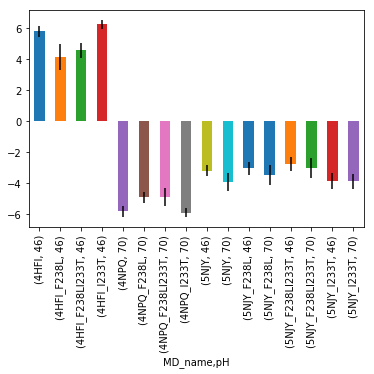

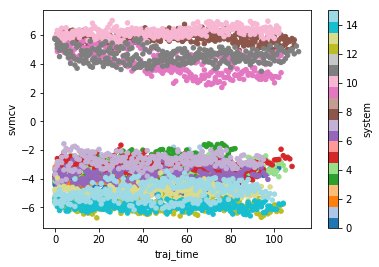

In [8]:
#md_feature = pd.read_csv("glic_gating_contact.csv")
md_feature = pd.read_csv("glic_gating.csv")
test_X = md_data.drop(columns=['MD_name', 'pH', 'replicate', 'traj_time','system','Unnamed: 0'])
#scaler = StandardScaler()
#scaler.fit(test_X)
test_x_scaled = test_X

trainset = md_data.drop(columns=['MD_name', 'pH', 'replicate', 'traj_time','Unnamed: 0'])

trainset = trainset[(trainset['system'] == 8) | (trainset['system'] == 12)]
trainset.loc[(trainset['system'] == 8),'system'] = 1
trainset.loc[(trainset['system'] == 12),'system'] = 0
trainset = trainset.reset_index()
trainset = trainset.drop(['index'],axis=1)
Y = trainset.as_matrix()[:,0]
X = trainset.as_matrix()[:,1:]
#X = scaler.fit_transform(trainset.as_matrix()[:,1:])
clf = SVC(kernel="linear")
clf.fit(X,Y)

#test_x_scaled = scaler.transform(test_X)

b=clf.decision_function(test_x_scaled)/np.linalg.norm(clf.coef_)
#b, index = reject_outliers(b)
#b_stand = (b - b.min()) / (b.max() - b.min())
md_feature['svmcv'] = b
print(test_X.columns[np.argsort(-np.abs(clf.coef_[0]))[:10]])
group = md_feature.groupby(['MD_name','pH'])['svmcv']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)
plt.show()
ax = plt.subplot()
md_feature.plot(kind="scatter",x="traj_time",y="svmcv",c='system',ax=ax,colormap='Vega20')
plt.show()

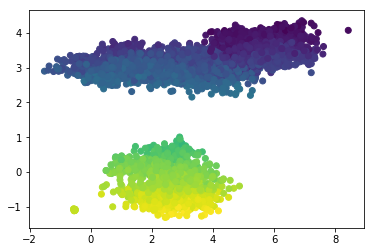

In [10]:
plt.scatter(md_feature['ecd_pc1'],md_feature['tmd_pc1'],c=b)

In [11]:
print(test_X.columns[np.argsort(-np.abs(clf.coef_[0]))[:100]])

Index(['contact 244 and next250', 'contact 246 and next250',
       'contact 245 and next250', 'contact 247 and next250',
       'contact 243 and next250', 'contact 196 and next247',
       'contact 196 and next244', 'contact 196 and next245',
       'contact 247 and next251', 'contact 245 and next251',
       'contact 244 and next249', 'contact 245 and next252',
       'contact 244 and next251', 'contact 246 and next251',
       'contact 196 and next243', 'contact 196 and next241',
       'contact 196 and next248', 'contact 242 and next250',
       'contact 240 and next250', 'contact 247 and next252',
       'contact 196 and next246', 'contact 246 and next252',
       'contact 245 and next249', 'contact 198 and next243',
       'contact 243 and next249', 'contact 244 and next252',
       'contact 239 and next250', 'contact 196 and next242',
       'contact 201 and next250', 'contact 243 and next251',
       'contact 198 and next244', 'contact 244 and next247',
       'contact 246 and 

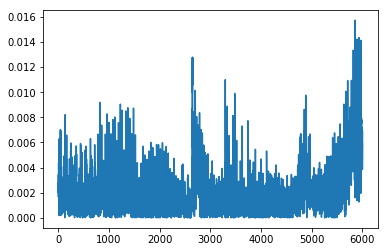

In [12]:
plt.plot(np.abs(clf.coef_[0]))

## M2 Neighbors

In [13]:
M2_index = np.concatenate([np.arange(215,240),np.arange(526,551),np.arange(837,862),np.arange(1148,1173),np.arange(1459,1484)])

In [14]:
traj_note = '4HFI_pH46_md1'
location = '/media/scottzhuang/data/MD/'
skip=10
top_location = traj_note + '/' + traj_note + ".ca.gro"
traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
traj = md.load(location + traj_location,top = location + top_location)

In [15]:
neighbor_indice = md.compute_neighbors(traj,1,M2_index)[0]

In [ ]:
neighbor_indice

In [18]:
contact_indice = []
for i in itertools.product(np.arange(191,215),np.arange(215,243)):
    for chain in range(0,5):
        contact_indice.append([i[0] + chain * 311,i[1] + chain * 311])
for i in itertools.product(np.arange(191,215),np.arange(242,280)):
    for chain in range(0,5):
        contact_indice.append([i[0] + chain * 311,i[1] + chain * 311])
for i in itertools.product(np.arange(215,243),np.arange(242,280)):
    for chain in range(0,5):
        contact_indice.append([i[0] + chain * 311,i[1] + chain * 311])
        
for i in itertools.product(np.arange(191,215),np.arange(215,243)):
    for chain in range(0,4):
        contact_indice.append([i[0] + chain * 311,i[1] + (chain + 1) * 311])
    contact_indice.append([i[0] + 4 * 311,i[1]])
for i in itertools.product(np.arange(191,215),np.arange(242,280)):
    for chain in range(0,4):
        contact_indice.append([i[0] + chain * 311,i[1] + (chain + 1) * 311])
    contact_indice.append([i[0] + 4 * 311,i[1]])
for i in itertools.product(np.arange(215,243),np.arange(215,243)):
    for chain in range(0,4):
        contact_indice.append([i[0] + chain * 311,i[1] + (chain + 1) * 311])
    contact_indice.append([i[0] + 4 * 311,i[1]])
for i in itertools.product(np.arange(215,243),np.arange(242,280)):
    for chain in range(0,4):
        contact_indice.append([i[0] + chain * 311,i[1] + (chain + 1) * 311])
    contact_indice.append([i[0] + 4 * 311,i[1]])

In [19]:
contact_indice

[[191, 215],
 [502, 526],
 [813, 837],
 [1124, 1148],
 [1435, 1459],
 [191, 216],
 [502, 527],
 [813, 838],
 [1124, 1149],
 [1435, 1460],
 [191, 217],
 [502, 528],
 [813, 839],
 [1124, 1150],
 [1435, 1461],
 [191, 218],
 [502, 529],
 [813, 840],
 [1124, 1151],
 [1435, 1462],
 [191, 219],
 [502, 530],
 [813, 841],
 [1124, 1152],
 [1435, 1463],
 [191, 220],
 [502, 531],
 [813, 842],
 [1124, 1153],
 [1435, 1464],
 [191, 221],
 [502, 532],
 [813, 843],
 [1124, 1154],
 [1435, 1465],
 [191, 222],
 [502, 533],
 [813, 844],
 [1124, 1155],
 [1435, 1466],
 [191, 223],
 [502, 534],
 [813, 845],
 [1124, 1156],
 [1435, 1467],
 [191, 224],
 [502, 535],
 [813, 846],
 [1124, 1157],
 [1435, 1468],
 [191, 225],
 [502, 536],
 [813, 847],
 [1124, 1158],
 [1435, 1469],
 [191, 226],
 [502, 537],
 [813, 848],
 [1124, 1159],
 [1435, 1470],
 [191, 227],
 [502, 538],
 [813, 849],
 [1124, 1160],
 [1435, 1471],
 [191, 228],
 [502, 539],
 [813, 850],
 [1124, 1161],
 [1435, 1472],
 [191, 229],
 [502, 540],
 [813, 8

# Plumed

In [14]:
from msmbuilder.featurizer import ContactFeaturizer

In [21]:
feat =ContactFeaturizer(contact_indice, scheme='closest-heavy')

In [22]:
top = md.load('/media/scottzhuang/data/MD/4NPQ_pH70_md5/4NPQ_pH70_md5.protein.gro')

In [23]:
top = md.load('/media/scottzhuang/data/MD/4NPQ_pH70_md5/4NPQ_pH70_md5.protein.gro')
df1 = pd.DataFrame(feat.describe_features(top))

In [29]:
plumed_matheval_template = Template("MATHEVAL ARG={{arg}} FUNC={{func}} LABEL={{label}} PERIODIC={{periodic}} ")

plumed_combine_template = Template("COMBINE LABEL={{label}} ARG={{arg}} COEFFICIENTS={{coefficients}} "+\
                                    "PERIODIC={{periodic}} ")
def render_svm(clf=None, input_prefix="f0", output_prefix="l"):
    if clf is None or check_is_fitted(clf,attributes=["coef_","intercept_"]):
        raise ValueError("Need a fitted Sklearn SVM object")
    else:
        n_args = clf.coef_.shape[1]
        output = []
        arg_list=",".join(["%s_%d"%(input_prefix,i) for i in range(n_args)])
        coeff = ",".join([str(i) for i in clf.coef_[0]])
        w_norm = np.linalg.norm(clf.coef_)
        
        output.append(plumed_combine_template.render(label="%s_0"%output_prefix,
                                      arg=arg_list,
                                      coefficients=coeff,
                                      periodic="NO")+"\n")
        
        func="(x+%s)/%s"%(str(clf.intercept_[0]),str(w_norm))
        
        output.append(plumed_matheval_template.render(label="%s_1"%output_prefix,
                                      arg="l_0",
                                      func=func,
                                      periodic="NO")+"\n")        
        
    return ''.join(output)
        
        

NameError: name 'Template' is not defined

In [23]:
from tica_metadynamics.pyplumed import render_df
from tica_metadynamics.pyplumed import render_meta 
from jinja2 import Template
from sklearn.utils.validation import check_is_fitted

In [28]:
total_out=[]
total_out.extend("RESTART\n")
total_out.extend(render_df(df1))
total_out.extend(render_svm(clf))
total_out.extend(render_meta.render_metad_code("l_1",biasfactor=6,sigma=0.25))
total_out.extend(render_meta.render_metad_bias_print("l_1,metad.bias"))

In [39]:
text_file = open("plum.txt", "w")
for item in total_out:
  text_file.write("%s" % item)
text_file.close()

# Plumed2

In [33]:
def render_svm(clf=None, input_prefix="f0", output_prefix="l"):
    if clf is None or check_is_fitted(clf,attributes=["coef_","intercept_"]):
        raise ValueError("Need a fitted Sklearn SVM object")
    else:
        n_args = clf.coef_.shape[1]
        output = []
        arg_list=",".join(["%s_%d"%(input_prefix,i) for i in range(n_args)])
        coeff = ",".join([str(i) for i in clf.coef_[0]])
        w_norm = np.linalg.norm(clf.coef_)
        
        output.append(plumed_combine_template.render(label="%s_0"%output_prefix,
                                      arg=arg_list,
                                      coefficients=coeff,
                                      periodic="NO")+"\n")
        c
        func="(x+%s)/%s"%(str(clf.intercept_[0]),str(w_norm))
        
        output.append(plumed_matheval_template.render(label="%s_1"%output_prefix,
                                      arg="l_0",
                                      func=func,
                                      periodic="NO")+"\n")        
        
    return ''.join(output)
        
        

In [34]:
total_out=[]
total_out.extend("RESTART\n")
total_out.extend(render_df(df))
total_out.extend(render_svm(clf))
total_out.extend(render_meta.render_metad_code("l_1",biasfactor=6,sigma=0.09))
total_out.extend(render_meta.render_metad_bias_print("l_1,metad.bias"))

In [35]:
print("".join(total_out))

RESTART
TORSION ATOMS=5,7,9,15 LABEL=phi_0_1 

TORSION ATOMS=7,9,15,17 LABEL=psi_1_2 

MATHEVAL ARG=phi_0_1 FUNC=sin(x) LABEL=f0_0 PERIODIC=NO 

MATHEVAL ARG=phi_0_1 FUNC=cos(x) LABEL=f0_1 PERIODIC=NO 

MATHEVAL ARG=psi_1_2 FUNC=sin(x) LABEL=f0_2 PERIODIC=NO 

MATHEVAL ARG=psi_1_2 FUNC=cos(x) LABEL=f0_3 PERIODIC=NO 

COMBINE LABEL=l_0 ARG=f0_0,f0_1,f0_2,f0_3 COEFFICIENTS=-1.04253438049,-0.658443006749,0.056290706147,-0.396689205189 PERIODIC=NO 
MATHEVAL ARG=l_0 FUNC=(x+0.143586820905)/1.29651690955 LABEL=l_1 PERIODIC=NO 
METAD ARG=l_1 SIGMA=0.09 HEIGHT=1.0 FILE=HILLS TEMP=300 PACE=1000 LABEL=metad BIASFACTOR=6
PRINT ARG=l_1,metad.bias STRIDE=1000 FILE=BIAS 
